<a href="https://colab.research.google.com/github/ldk7024/Deep_Learning_Study/blob/main/21_07_14_%EC%82%AC%EB%9E%8C_(%EA%B0%95%EC%A4%80%2C_%EC%88%98%ED%99%98)_%EC%96%BC%EA%B5%B4_%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 강준, 수환님 얼굴을 분류하는 이진분류 모델을 만들어보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image # PIL: 이미지를 불러오게끔 해주는 라이브러리

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


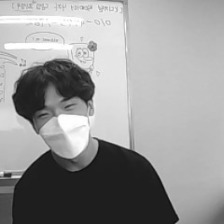

In [3]:
# 이미지를 가져와서 흑백으로 전환
# convert -> L: 흑백, RGB: 컬러
img = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/Class 1-samples/1.jpg").convert('L')
img

In [4]:
# 이미지 데이터를 numpy 배열로 변환
# 기계가 인식할 수 있도록 이미지 데이터를 숫자 데이터로 변환시켜줘야 하기 때문
# -> 가로 (행), 세로 (열) 픽셀 수 만큼 변경을 시켜줌
img_array = np.array(img)

# 손글씨, 패션데이터는 kerasㄴ에서 제공하는 학습용 데이터이기 때문에 사전에 수치형태로 변환되어져 있었음

In [5]:
img_array.shape

(224, 224)

In [6]:
img_array

array([[155, 156, 158, ..., 157, 157, 157],
       [192, 192, 193, ..., 157, 157, 158],
       [193, 193, 193, ..., 158, 158, 158],
       ...,
       [ 75,  76,  77, ...,  96,  95,  94],
       [ 76,  76,  76, ...,  97,  97,  96],
       [ 76,  76,  76, ...,  98,  98,  97]], dtype=uint8)

In [7]:
# 데이터 셋 구성 (인물별 200장씩)

In [8]:
# 반복문 실행시 어느정도 실행되고 있는지 %로 알려주는 라이브러리
from tqdm import tqdm

In [9]:
class1_list = [] # 강준이형 데이터가 저장될 자리
class2_list = [] # 수환님 데이터가 저장될 자리

for i in tqdm(range(0,200,1)):
# 1. 강준이형 데이터 작업
# 경로와 이름에 맞게 이미지를 가져와서 흑백으로 변환한 후에 img1이라는 변수에 담아줌
  img1 = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/Class 1-samples/"+str(i)+".jpg").convert('L')
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  img_array1 = np.array(img1)
  # numpy 배열로 변환된 데이터를 빈 리스트에 하나씩 추가해주기
  class1_list.append(img_array1)

  # 2. 수환님 데이터 작업
  img2 = Image.open("/content/drive/MyDrive/Colab Notebooks/빅데이터4차(딥러닝)/data/Class 2-samples/"+str(i)+".jpg").convert('L')
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  img_array2 = np.array(img2)
  # numpy 배열로 변환된 데이터를 빈 리스트에 하나씩 추가해주기
  class2_list.append(img_array2)


100%|██████████| 200/200 [03:16<00:00,  1.02it/s]


In [10]:
class1_list

[array([[154, 155, 157, ..., 158, 158, 158],
        [193, 193, 193, ..., 158, 158, 158],
        [193, 193, 193, ..., 158, 158, 158],
        ...,
        [ 76,  78,  79, ...,  95,  94,  93],
        [ 75,  76,  78, ...,  97,  95,  94],
        [ 74,  75,  76, ...,  97,  96,  95]], dtype=uint8),
 array([[155, 156, 158, ..., 157, 157, 157],
        [192, 192, 193, ..., 157, 157, 158],
        [193, 193, 193, ..., 158, 158, 158],
        ...,
        [ 75,  76,  77, ...,  96,  95,  94],
        [ 76,  76,  76, ...,  97,  97,  96],
        [ 76,  76,  76, ...,  98,  98,  97]], dtype=uint8),
 array([[156, 157, 158, ..., 157, 157, 157],
        [192, 193, 193, ..., 158, 158, 158],
        [192, 192, 193, ..., 158, 158, 158],
        ...,
        [ 75,  76,  76, ...,  94,  94,  93],
        [ 74,  75,  76, ...,  96,  96,  95],
        [ 74,  74,  75, ...,  98,  97,  97]], dtype=uint8),
 array([[159, 159, 161, ..., 157, 157, 157],
        [192, 192, 193, ..., 157, 157, 157],
        [193, 19

In [11]:
class2_list

[array([[155, 157, 159, ..., 157, 157, 157],
        [192, 192, 193, ..., 158, 158, 158],
        [192, 193, 193, ..., 159, 159, 159],
        ...,
        [ 77,  78,  79, ...,  95,  94,  94],
        [ 77,  77,  78, ...,  97,  96,  96],
        [ 77,  77,  78, ...,  98,  98,  97]], dtype=uint8),
 array([[153, 155, 158, ..., 157, 157, 157],
        [188, 189, 191, ..., 158, 158, 158],
        [191, 191, 192, ..., 159, 159, 159],
        ...,
        [ 76,  77,  79, ...,  95,  94,  94],
        [ 75,  77,  78, ...,  96,  96,  95],
        [ 75,  76,  78, ...,  97,  96,  95]], dtype=uint8),
 array([[149, 150, 153, ..., 157, 157, 157],
        [192, 193, 193, ..., 158, 158, 158],
        [192, 192, 192, ..., 159, 159, 159],
        ...,
        [ 77,  78,  79, ...,  94,  93,  93],
        [ 77,  78,  79, ...,  95,  96,  96],
        [ 77,  78,  79, ...,  96,  98,  98]], dtype=uint8),
 array([[155, 156, 159, ..., 156, 155, 155],
        [191, 191, 192, ..., 157, 157, 156],
        [193, 19

In [12]:
# 리스트 자체도 numpy 배열로 변환
# -> 사진 하나하나도 numpy 배열로, 사진 데이터가 담긴 리스트도 numpy배열로 변화 시켜줘야함

class1_numpy = np.array(class1_list) # 강준
class2_numpy = np.array(class2_list) # 수환

# 두 배열을 순서대로 붙여주기 (문제 데이터 생성)
data = np.concatenate((class1_numpy,class2_numpy))

In [13]:
data.shape
# 강준이형 데이터 200개 + 수환님 데이터 200개, 총 400개의 이미지 데이터가 수치로 변화되어서 data라는 변수에 담겨짐

(400, 224, 224)

In [14]:
# 정답 데이터 만들기 (문제와 정답의 순서를 일정하게 맞춰줘야함)
# 0: 강준이형 데이터의 정답, 1: 수환님 데이터의 정답
target = np.array([0]*200 + [1]*200)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
target.shape

(400,)

### 강준이형, 수환님 이미지 데이터를 분류하는 신경망 모델 만들기

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [17]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(data,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 99
                                                    )

In [18]:
print(X_train.shape)  # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_train.shape)
print(X_test.shape)   # 데이터 개수, 가로 픽셀수, 세로 픽셀수
print(y_test.shape)

(320, 224, 224)
(320,)
(80, 224, 224)
(80,)


In [19]:
# 신경망 구조 설계
model = Sequential()

model.add(Flatten(input_shape =(224,224)))

model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 400)               20070800  
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 20,174,161
Trainable params: 20,174,161
Non-trainable params: 0
____________________________________________

In [20]:
# 2. 학습/ 평가 방법 설정
model.compile(loss ="binary_crossentropy",
               optimizer = 'Adam',            # Adam : 최근에 가장 많이 사용되는 성능이 높은 최적화 함수
               metrics = ["acc"]               # metrics: 평가 방법을 설정 (분류 문제이기 때문에 정확도(acc)를 확인)
               )

In [21]:
h = model.fit(X_train, 
              y_train, 
              validation_split = 0.2,
              epochs=50)

# validation_split : 자동으로 train 데이터에서 검증 데이터를 분리시켜주는 명령
# 주의점: 분리시켜줄 때 뒤에서부터 20%를 잘라줌
# 일정한 값으로 정렬돼 있는 데이터에는 사용불가
# train_test_split 명령으로 사전에 랜덤 샘플링을 진행했기 때문에 바로 validation_split 명령을 사용 가능!

Epoch 1/50
8/8 [==============================] - 3s 44ms/step - loss: 2372.2415 - acc: 0.4922 - val_loss: 1.1019 - val_acc: 0.9844
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 174.2962 - acc: 0.8594 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.6415 - acc: 0.9922 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 4/50
8/8 [==============================] - 0s 17ms/step - loss: 2.4357 - acc: 0.9883 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 14.8268 - acc: 0.9570 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 1.2575e-04 - val_acc: 1.0000
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.3871 - acc: 0.9961 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 8/50
8/8 [==============================] - 0s 15ms/step 

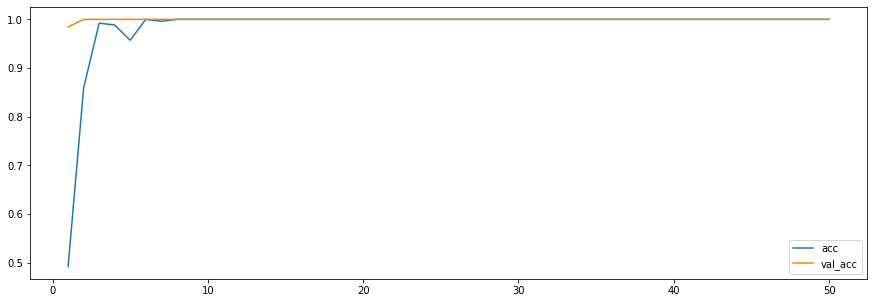

In [22]:
# 시각화

plt.figure(figsize=(15,5))

# train 데이터
plt.plot(range(1,51),
         h.history['acc'],
         label ='acc'
         )
# val 데이터
plt.plot(range(1,51),
         h.history['val_acc'],
         label ='val_acc'
         )

plt.legend()
plt.show()

In [23]:
# 모델 평가
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]